In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df_train = pd.read_csv('/content/drive/MyDrive/Kaggle/Machine Learning/Titanic - Machine Learning from Disaster/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Kaggle/Machine Learning/Titanic - Machine Learning from Disaster/test.csv')

In [88]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Survived: 0 = No , 1 = Yes

In [90]:
import io
from IPython.display import display, HTML
buffer = io.StringIO()
df_train.info(buf=buffer)
info_str = buffer.getvalue()

# Prepare all three outputs
info_html = f"<pre>{info_str}</pre>"
describe_html = df_train.describe().to_html()
nulls_html = df_train.isnull().sum().to_frame(name='Missing Values').to_html()

# Display side-by-side
display(HTML(f"""
<div style="display: flex; gap: 20px;">
    <div>{info_html}</div>
    <div>{describe_html}</div>
    <div>{nulls_html}</div>
</div>
"""))

**📍 Investigating Null Values**

In [91]:
df_train[df_train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**Cabin**

In [92]:
no_cabin = df_train['Cabin'].isnull().groupby(df_train['Survived']).sum()
w_cabin = df_train['Cabin'].notnull().groupby(df_train['Survived']).sum()
print(f'{no_cabin} no cabin, 1 = survived')
print(f'{w_cabin} with cabin , 0 = dead')

Survived
0    481
1    206
Name: Cabin, dtype: int64 no cabin, 1 = survived
Survived
0     68
1    136
Name: Cabin, dtype: int64 with cabin , 0 = dead


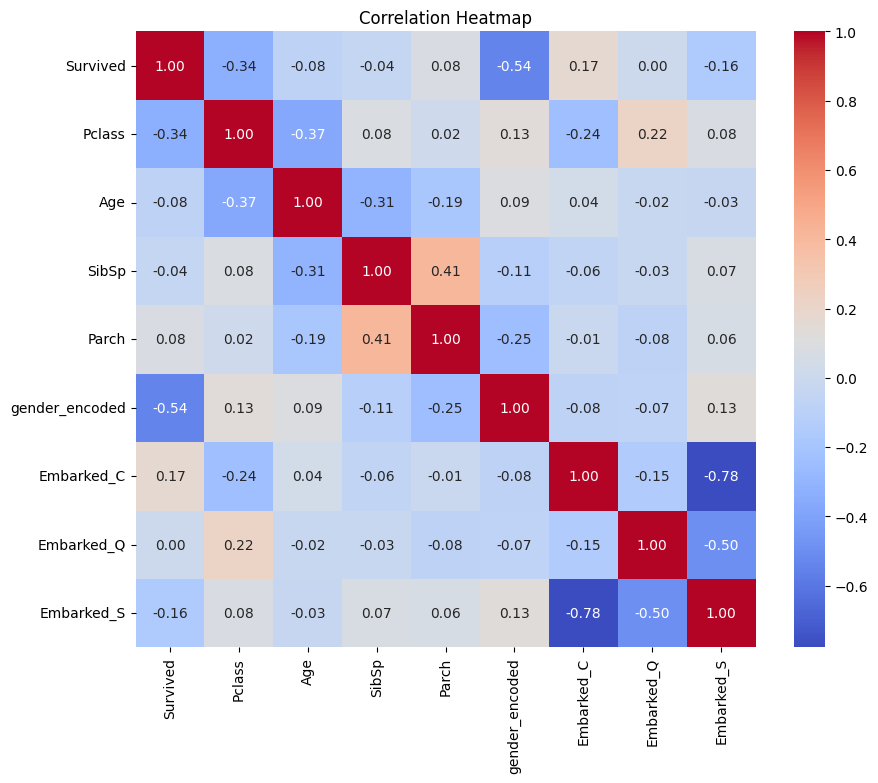

In [93]:
df_train_copy = df_train.copy()
df_train_copy['gender_encoded'] = df_train_copy['Sex'].map({'male': 1 , 'female': 0})
# df_train_copy['embarked_encoded'] = df_train_copy['Embarked'].map({'S': 1, 'C' : 2, 'Q': 3})
df_dummies = pd.get_dummies(df_train_copy['Embarked'], prefix='Embarked')
df_train_copy = pd.concat([df_train_copy, df_dummies], axis=1)
# cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'gender_encoded', 'embarked']
# sns.heatmap(df_train_copy[cols].corr(), annot = True , cmap = 'coolwarm')
# df_train_copy.head(10)
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'gender_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_train_copy[cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [94]:
df_train_copy.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender_encoded,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,True,False,False


In [95]:
df_train_copy['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [96]:
df_train_copy['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


Dealing with NULL values.


1. Age: I will use imputation: median  or mean, depends on age distrubution.
2. Cabin: 77% missing value. Will drop the column.
3. Embarked: 2 missing values, wil use categorica. most frequent values.







**📍 Data Preprocessing**

In [97]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df_train.drop('Cabin', axis = 1, inplace = True)

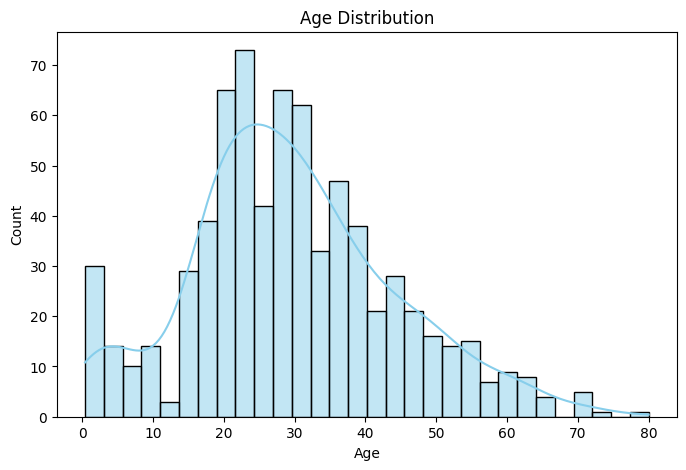

In [99]:
plt.figure(figsize = (8, 5))
sns.histplot(
    df_train['Age'],
    bins = 30,
    kde =  True,
    color = 'skyblue'
)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [100]:
median_age = df_train['Age'].median()
print(median_age)

28.0


In [101]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

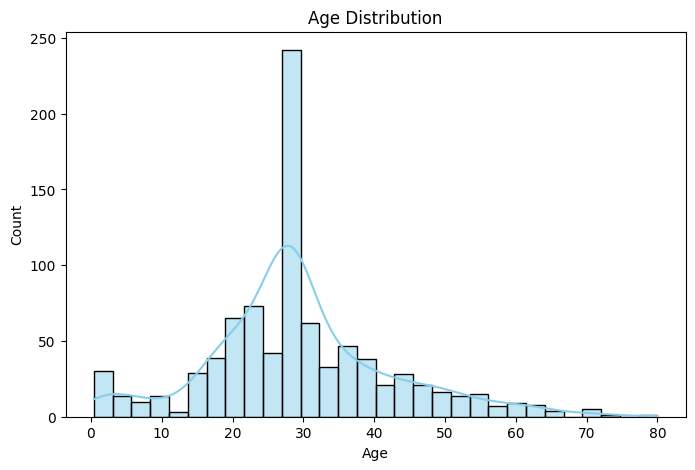

In [102]:
plt.figure(figsize= (8, 5))
sns.histplot (
    df_train['Age'],
    bins = 30,
    kde = True,
    color = 'skyblue'
)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [103]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [104]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [105]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)

/tmp/ipython-input-105-4134251899.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)


In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [107]:
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S


In [108]:
df_train.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

**📍 Model**

**Logistic Regression**

In [109]:
from sklearn.preprocessing import LabelEncoder
# df_train['Sex'] = LabelEncoder().fit_transform(df_train['Sex'])
df_train = pd.get_dummies(df_train, columns = ['Sex'], drop_first = True)

In [110]:
df_train = pd.get_dummies(df_train, columns = ['Pclass', 'Embarked'], drop_first = True)

In [111]:
from sklearn.preprocessing import StandardScaler
df_train['Fare'] = StandardScaler().fit_transform(df_train[['Fare']])

In [112]:
df_train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,-0.502445,True,False,True,False,True
1,1,38.0,1,0,0.786845,False,False,False,False,False
2,1,26.0,0,0,-0.488854,False,False,True,False,True
3,1,35.0,1,0,0.420730,False,False,False,False,True
4,0,35.0,0,0,-0.486337,True,False,True,False,True


**Data Split**

In [113]:
X = df_train.drop('Survived', axis = 1)
y = df_train['Survived']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [115]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [116]:
y_pred = model.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       106
           1       0.80      0.70      0.74        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Class 0 = negative case = did not survive

Class 1 = positive case = survived

In [118]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

      Feature  Coefficient
3        Fare     0.105016
7  Embarked_Q     0.058602
2       Parch     0.028624
0         Age    -0.036326
1       SibSp    -0.332732
8  Embarked_S    -0.429014
5    Pclass_2    -0.679326
6    Pclass_3    -2.075507
4    Sex_male    -2.547434



Fare (0.105) =	Higher fare → more likely to survive. Often correlated with higher-class passengers.

Embarked_Q (0.059)	= Passengers who embarked at Queenstown had slightly higher odds of survival than those at Cherbourg (baseline).

Parch (0.029)	= Having parents/children onboard slightly increases survival odds. Suggests families had priority.

Age (-0.036) = Older passengers were slightly less likely to survive.

SibSp (-0.333) = More siblings/spouses onboard may reduce survival chance (possibly due to more distraction/effort to save others).

Embarked_S (-0.429) = Passengers from Southampton had lower odds compared to Cherbourg (baseline).

Pclass_2 (-0.679) =	Second class passengers were less likely to survive compared to first class.

Pclass_3	(-2.076) =	Third class passengers had significantly lower survival chances.

Sex_male	(-2.547) =	Being male greatly reduced survival odds — aligns with "women and children first."

In [126]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel='rbf', gamma='scale')
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

65.87

**📍 XGBOOST**

In [120]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder = True, eval_metrics = 'logloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:25:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [121]:
y_pred = model.predict(X_test)

In [122]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report: \n', classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.93      0.85       106
           1       0.86      0.60      0.71        73

    accuracy                           0.80       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.80      0.79       179



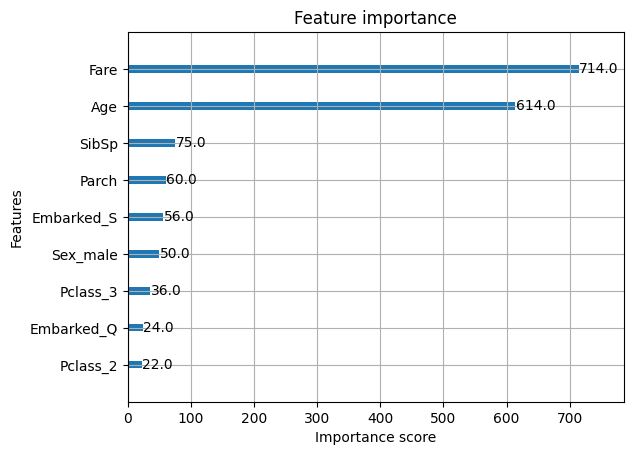

In [123]:
import xgboost as xgb

xgb.plot_importance(model)
plt.show()

**Tuning**

In [124]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.01,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

watchlist = [(dtrain, 'train'), (dval, 'eval')]

model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    early_stopping_rounds=10,
    evals=watchlist,
    verbose_eval=False
)


In [125]:
dtest = xgb.DMatrix(X_test)
y_pred = (model.predict(dtest) > 0.5).astype(int)

# Evaluate
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report: \n', classification_report(y_test, y_pred))

Accuracy: 0.776536312849162

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       106
           1       0.85      0.55      0.67        73

    accuracy                           0.78       179
   macro avg       0.80      0.74      0.75       179
weighted avg       0.79      0.78      0.76       179

